# Первый джупитер ноутбук
## Вычисление числа $\pi$ методом Монте-Карло

## Формулы, необходимые для вычисления числа $\pi$ методом Монте-Карло:
$$S_{Круга}=\pi*R^2$$
$$S_{Квадрата}=a^2$$
$$P_1=\frac{S_{Круга}}{S_{Квадрата}}=\frac{\pi*R^2}{a^2}=\frac{\pi*R^2}{(2R)^2}=\frac{\pi}{2^2}=\frac{\pi}{4}$$
$$\pi=4P_1$$

## Применение метода выглядит следующим образом:

![число пи методом Монте-Карло](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcJ4Y6q%2Fbtrb1b3tEK8%2FQr89tregTeW8B4KgLuB9sk%2Fimg.png)

## Программа на Python

In [6]:
import random # Для генерации псевдослучайных чисел
import matplotlib.pyplot as plt # Для построения графиков

In [7]:
num_points = 1000000 # количество дротиков

In [8]:
points = []
hits = 0
for _ in range(num_points):
    x, y = random.random(), random.random()
    if x*x + y*y < 1.0:
        hits += 1
        points.append((x, y, "red"))
    else:
        points.append((x, y, "blue"))

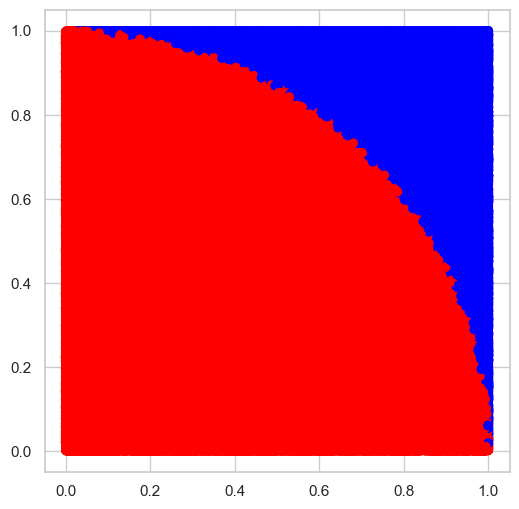

In [9]:
x, y, colors = zip(*points)
fig, ax = plt.subplots()
fig.set_size_inches(6.0, 6.0)
ax.scatter(x, y, c=colors)
fraction = hits / num_points

Вычислим число $\pi$:

In [10]:
print("Число пи равно ", 4 * fraction);

Число пи равно  3.141228


## Работа с git diff

gitdiff показывает необработанные изменения JSON без рендеринга Markdown или вывода, подсветки синтаксиса кода, структуры jupyter notebook, из-за этого изменения выглядят страшно и нечеловекочитаемо.

Для решения этой проблемы можно использовать расширение JupyterLab Git. Оно позволяет просматривать различия в файлах прямо в пользовательском интерфейсе JupyterLab одним нажатием кнопки, это далеко не единственный способ, но вполне рабочий.

## Что происходит без requirements.txt

Язык R работает в Binder, потому что он там есть, вот и весь ответ.

Лично у меня и блокнот `fig3/fig3bc.ipynb` не заработал в Binder, он также выдал ошибку о том, что не удается подключить модули, хотя, по идее, как планировалось в задании, из-за файлов конфигурации и рекомендаций, в которых указано, что нужно для исполнения блокнота, он должен был запуститься нормально в Binder, но не запуститься после скачивания на свою машину.

Чтобы такого не было, можно использовать `!python -m pip install pandas matplotlib seaborn ipywidgets` или `!python -m pip install -r requirements.txt`, притом в текстовом файле должны присутствовать названия каждого необходимого модуля, или даже название==версия, чтобы уж наверняка.

Попробуем установить недостающие модули и запустить:

In [4]:
!python -m pip install pandas matplotlib seaborn ipywidgets jupyter

   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   -- ------------------------------------- 0.3/5.0 MB ? eta -:--:--
   ------ --------------------------------- 0.8/5.0 MB 3.0 MB/s eta 0:00:02
   ------------ --------------------------- 1.6/5.0 MB 3.6 MB/s eta 0:00:01
   -------------------- ------------------- 2.6/5.0 MB 3.9 MB/s eta 0:00:01
   ----------------------------- ---------- 3.7/5.0 MB 4.1 MB/s eta 0:00:01
   ----------------------------------- ---- 4.5/5.0 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 5.0/5.0 MB 4.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.6 MB 4.9 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.6 MB 4.8 MB/s eta 0:00:03
   ---------- ----------------------------- 3.1/11.6 MB 4.9 MB/s eta 0:00:02
   -------------- ------------------------- 4.2/11.6 MB 5.0 MB/s eta 0:00:02
   ------------------ ------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from itertools import cycle

In [3]:
full_day_index = pd.date_range("1970-01-01", periods=24*2, freq='30Min')

## Weekday

In [5]:
df = pd.read_csv("https://github.com/timalthoff/activityinequality/blob/master/data/city_step_counts_weekday.csv", header=None)

NameError: name 'pd' is not defined

NameError: name 'df' is not defined

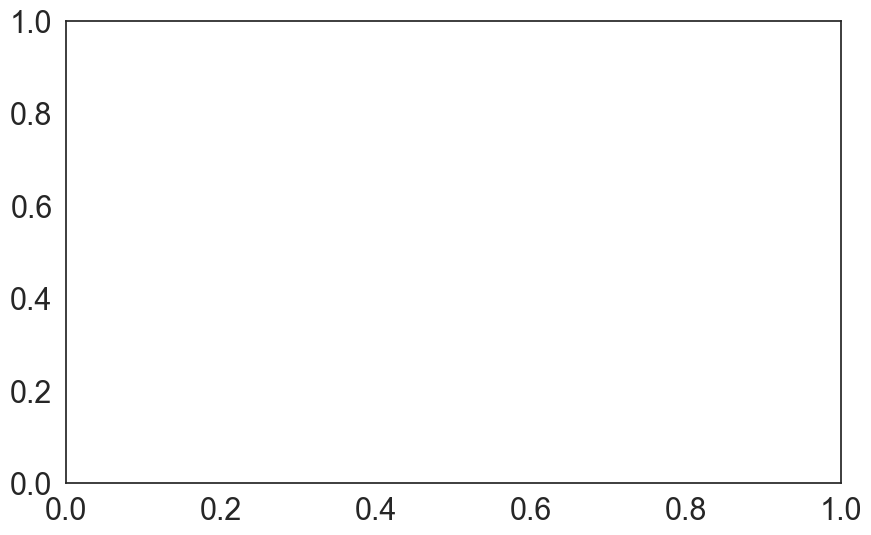

In [5]:
N = 10
colors_top = cycle(sns.light_palette("green", n_colors=N, reverse=True))
colors_bottom = cycle(sns.light_palette("blue", n_colors=N, reverse=True))
sns.set(style="white", font_scale=2.0)

fig, ax = plt.subplots(figsize=(10,6))
for row in df.values:
    if row[1]!="top": continue
    c = row[0]
    ts = pd.Series(row[3:], index=full_day_index)
    ts.plot(label=c, color=next(colors_top), ax=ax)
#     print row
    
for row in df.values:
    if row[1]!="bottom": continue
    c = row[0]
    ts = pd.Series(row[3:], index=full_day_index)
    ts.plot(label=c, color=next(colors_bottom), ax=ax)
#     print row

legend = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="U.S. City", ncol=2)
plt.setp(legend.get_title(), fontsize=30)
plt.ylabel("Average steps per 30 minutes")
plt.xlabel("Time of day")

plt.tight_layout()
plt.savefig("../output/fig3b.pdf", dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')

plt.show()

## Weekend

In [6]:
df = pd.read_csv("https://github.com/timalthoff/activityinequality/blob/master/data/city_step_counts_weekend.csv", header=None)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 42, saw 31


NameError: name 'df' is not defined

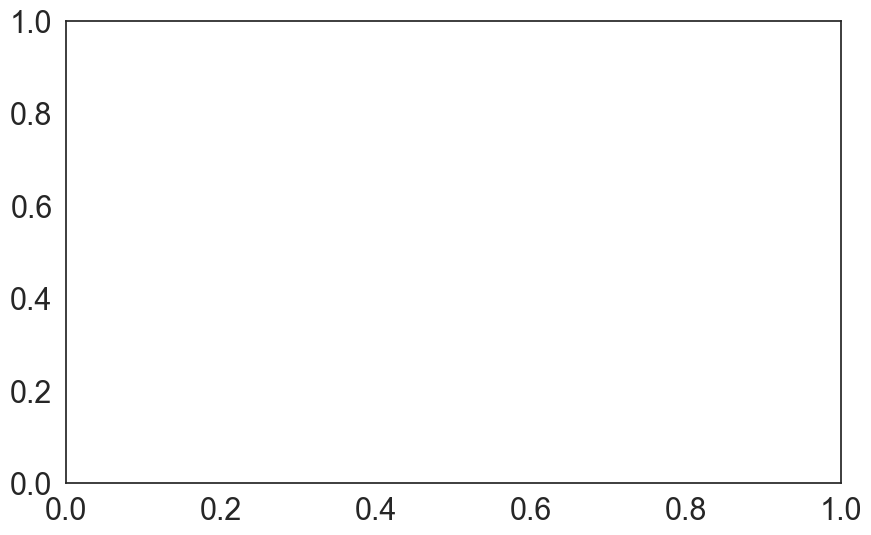

In [7]:
N = 10
colors_top = cycle(sns.light_palette("green", n_colors=N, reverse=True))
colors_bottom = cycle(sns.light_palette("blue", n_colors=N, reverse=True))
sns.set(style="white", font_scale=2.0)

fig, ax = plt.subplots(figsize=(10,6))
for row in df.values:
    if row[1]!="top": continue
    c = row[0]
    ts = pd.Series(row[3:], index=full_day_index)
    ts.plot(label=c, color=next(colors_top), ax=ax)
#     print row
    
for row in df.values:
    if row[1]!="bottom": continue
    c = row[0]
    ts = pd.Series(row[3:], index=full_day_index)
    ts.plot(label=c, color=next(colors_bottom), ax=ax)
#     print row

legend = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="U.S. City", ncol=2)
plt.setp(legend.get_title(), fontsize=30)
plt.ylabel("Average steps per 30 minutes")
plt.xlabel("Time of day")

plt.tight_layout()
plt.savefig("../output/fig3c.pdf", dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')

plt.show()

## Виджеты

In [7]:
from matplotlib import pyplot
import random
from ipywidgets import interact, widgets

%matplotlib inline


def throw_darts(num_points):
    points = []
    hits = 0
    for _ in range(num_points):
        x, y = random.random(), random.random()
        if x*x + y*y < 1.0:
            hits += 1
            points.append((x, y, True))
        else:
            points.append((x, y, False))
    fraction = hits / num_points
    pi = 4 * fraction
    return pi, points


def create_plot(points):
    x, y, colors = zip(*points)
    pyplot.scatter(x, y, c=colors)


def experiment(num_points):
    pi, points = throw_darts(num_points)
    create_plot(points)
    print("approximation:", pi)

interactive(children=(IntSlider(value=1000, description='num_points', max=10000, min=100, step=100), Output())…

<function __main__.experiment(num_points)>

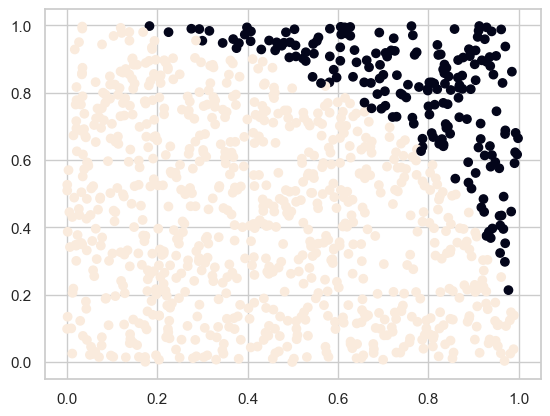

In [9]:
interact(experiment, num_points=widgets.IntSlider(min=100, max=10000, step=100, value=1000))

### Примеры других виджетов:

1. Ползунок. Позволяет настраивать пороговое значение фильтра данных.
2. Текстовое поле. Используется для ввода поискового запроса.
3. Флажок. Им можно выбирать или отменять выбор столбца в таблице данных.
4. Выпадающее меню. Например, для выбора модели для обучения.
5. Кнопка. 25 Позволяет отправлять форму или запускать ячейку с кодом.
6. Интерактивный график. Например, для визуализации результатов модели машинного обучения.
7. Мини-приложение в блокноте. Пользователь может указать имя домена, а блокнот будет проверять домен и строить график времени ответа.

Для создания интерактивных виджетов в Jupyter Notebook используется библиотека ipywidgets. 

In [10]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)


def noisy_gaussian():
    # gaussian array y in interval -5 <= x <= 5
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y


def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit


def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()


x, y = noisy_gaussian()
def update(n=5):
    yfit = fit(x, y, n)
    plot(x, y, yfit)

In [11]:
interact(update, n=(widgets.IntSlider(min=3, max=30, step=1,value=5)))

interactive(children=(IntSlider(value=5, description='n', max=30, min=3), Output()), _dom_classes=('widget-int…

<function __main__.update(n=5)>

## Профилирование ячеек

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def step():
    import random
    return 1. if random.random() > .5 else -1.

In [15]:
def walk(n):
    x = np.zeros(n)
    dx = 1. / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0.
        else:
            x[i + 1] = x_new
    return x

In [16]:
n = 100000
x = walk(n)

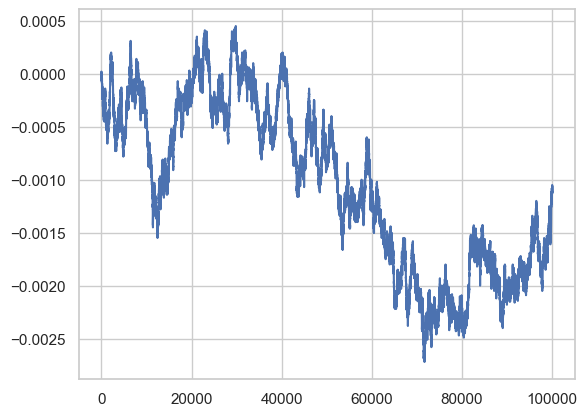

In [17]:
# График
plt.plot(x)
plt.show()

In [59]:
# Время выполнения
t1 = %timeit -o walk(n)

80.1 ms ± 527 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
!pip install line_profiler


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# Профилировщик ячеек обрезки
%prun
walk(n)

array([ 0.00e+00,  1.00e-05,  0.00e+00, ..., -2.97e-03, -2.98e-03,
       -2.97e-03])

         3 function calls in 0.000 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)

Ошибку заметить трудно, так как оно слишком быстро выполнилось, наверное, связано со слишком высокой производительностью за такт или еще из-за чего-то.

In [22]:
%load_ext line_profiler
%lprun -f walk walk(n)

Timer unit: 1e-07 s

Total time: 0.437121 s

Could not find file C:\Users\Федор\AppData\Local\Temp\ipykernel_3604\2505900611.py
Are you sure you are running this program from the same directory
that you ran the profiler from?
Continuing without the function's contents.

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           
     2         1       1582.0   1582.0      0.0  
     3         1         40.0     40.0      0.0  
     4    100000     557877.0      5.6     12.8  
     5     99999    2619338.0     26.2     59.9  
     6     99999     530166.0      5.3     12.1  
     7                                           
     8                                           
     9     99999     662194.0      6.6     15.1  
    10         1         14.0     14.0      0.0

Как видим больше всего времени ушло на строку 5 ячейки с функцией `walk()`, это строка `x_new = x[i] + dx * step()`, значит ошибка, которая тормозит всё находится в функции `step()`, если посмотреть на эту функцию, видно, что в ней зачем-то импортят рандом при каждом вызове функции, исправим это и замерим время:

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [48]:
def rightStep():
    return 1. if random.random() > .5 else -1.

In [49]:
def newWalk(n):
    x = np.zeros(n)
    dx = 1. / n
    for i in range(n - 1):
        x_new = x[i] + dx * rightStep()
        if x_new > 5e-3:
            x[i + 1] = 0.
        else:
            x[i + 1] = x_new
    return x

In [50]:
n = 100000
x = newWalk(n)

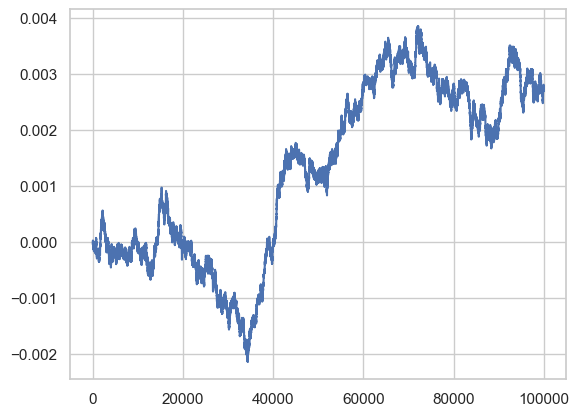

In [51]:
plt.plot(x)
plt.show()

In [60]:
t1 = %timeit -o newWalk(n)

61.7 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Уже на 20 милисек меньше

In [53]:
%load_ext line_profiler
%lprun -f step walk(n)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-07 s

Total time: 0.142486 s

Could not find file C:\Users\Федор\AppData\Local\Temp\ipykernel_3604\1062327543.py
Are you sure you are running this program from the same directory
that you ran the profiler from?
Continuing without the function's contents.

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           
     2     99999     699832.0      7.0     49.1  
     3     99999     725029.0      7.3     50.9

In [55]:
%reload_ext line_profiler
%load_ext line_profiler
%lprun -f rightStep newWalk(n)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-07 s

Total time: 0.0938957 s

Could not find file C:\Users\Федор\AppData\Local\Temp\ipykernel_3604\798669002.py
Are you sure you are running this program from the same directory
that you ran the profiler from?
Continuing without the function's contents.

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           
     2     99999     938957.0      9.4    100.0

Если сложить 699832 и 725029, получим 1424861, а теперь вычтем из этого время исправленной функции 938957, получим 485904, а это очень много. Ну, как было замечано выше, даже время полного выполнения уменьшилось на 20 милесек - это много.

In [58]:
print(699832+725029)
print(1424861-938957)

1424861
485904
